# Iris Dataset analysis

### Import the dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from urllib.request import urlretrieve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

c:\Users\19023\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
c:\Users\19023\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps, copy_X=True, fit_path=Tru

In [2]:
iris = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
urlretrieve(iris)

('C:\\Users\\19023\\AppData\\Local\\Temp\\tmpzrbtm15p',
 <http.client.HTTPMessage at 0x225a5e17d68>)

In [3]:
df = pd.read_csv(iris, sep=',')
attributes = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
df.columns = attributes
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


### Analysis the Correlation

In [4]:
df["class_num"] = 0
for i in range(len(df)):
    if (df["class"][i] == "Iris-setosa"):
        df["class_num"][i] = 1
    elif (df["class"][i] == "Iris-versicolor"):
        df["class_num"][i] = 2
    elif (df["class"][i] == "Iris-virginica"):
        df["class_num"][i] = 3
df.corr()

c:\Users\19023\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
c:\Users\19023\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\Users\19023\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,sepal_length,sepal_width,petal_length,petal_width,class_num
sepal_length,1.000000,-0.103784,0.871283,0.816971,0.781219
sepal_width,-0.103784,1.000000,-0.415218,-0.350733,-0.414532
petal_length,0.871283,-0.415218,1.000000,0.962314,0.948519
petal_width,0.816971,-0.350733,0.962314,1.000000,0.956014
class_num,0.781219,-0.414532,0.948519,0.956014,1.000000


In [5]:
df_setosa = df[df["class"] == "Iris-setosa"]
df_versicolor = df[df["class"] == "Iris-versicolor"]
df_virginica = df[df["class"] == "Iris-virginica"]

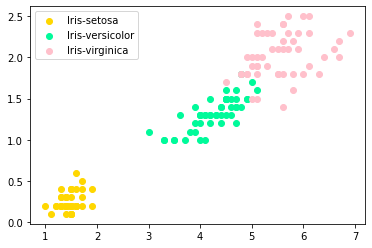

In [6]:
plt.scatter(x=df_setosa['petal_length'], y=df_setosa['petal_width'], c="gold", label='Iris-setosa')
plt.scatter(x=df_versicolor['petal_length'], y=df_versicolor['petal_width'], c="mediumspringgreen", label='Iris-versicolor')
plt.scatter(x=df_virginica['petal_length'], y=df_virginica['petal_width'], c="pink", label="Iris-virginica")
plt.legend()
plt.show()

### Use $\frac{3}{4}$ of the dataset to train, and the other to test.

In [7]:
X = df.drop(columns=["sepal_length", "sepal_width", "class", "class_num"], inplace=False)
Y = pd.DataFrame(df["class_num"])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=7)
print('Training set length: {}.\nTest set length: {}'.format(X_train.shape[0], X_test.shape[0]))

Training set length: 119.
Test set length: 30


In [9]:
model = StandardScaler().fit(X_train)
X_train = model.transform(X_train)
X_test = model.transform(X_test)

### Visualization Prediction and Target

In [14]:
def VisualizationPredict(predictions):
    predictions_ = pd.DataFrame(predictions)
    y_test_ = pd.DataFrame(y_test).reset_index()
    X_test_ = pd.DataFrame(X_test).reset_index()

    TruePred = []
    FalsePred = []
    for i in range(len(y_test_)):
        d = {"petal_length": X_test_[0][i], "petal_width": X_test_[1][i]}
        if (predictions_[0][i] == y_test_["class_num"][i]):
            TruePred.append(d)
        else:
            FalsePred.append(d)
    TruePred = pd.DataFrame(TruePred)
    FalsePred = pd.DataFrame(FalsePred)
    return TruePred, FalsePred

## KNN model analysis

In [15]:
model1 = KNeighborsClassifier()
model1.fit(X_train,y_train)
predictions1 = model1.predict(X_test)
print(accuracy_score(y_test, predictions1))

1.0


c:\Users\19023\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
c:\Users\19023\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:781: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._y = np.empty(y.shape, dtype=np.int)


In [16]:
TruePred, FalsePred = VisualizationPredict(predictions1)

In [17]:
FalsePred == None

""


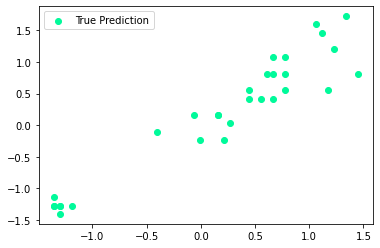

In [18]:
plt.scatter(x=TruePred['petal_length'], y=TruePred['petal_width'], c="mediumspringgreen", label='True Prediction')
# plt.scatter(x=FalsePred['petal_length'], y=FalsePred['petal_width'], c="tomato", label='False Prediction')
plt.legend()
plt.show()

### Logistic Regression Model Analysis

In [19]:
model2 = LogisticRegression()
model2.fit(X_train, y_train)
predictions2 = model2.predict(X_test)
print(accuracy_score(y_test, predictions2))

0.9


c:\Users\19023\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
TruePred, FalsePred = VisualizationPredict(predictions2)

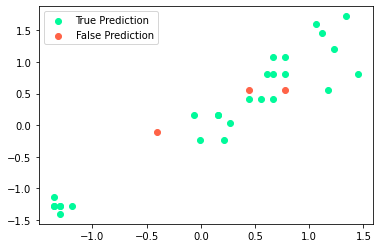

In [21]:
plt.scatter(x=TruePred['petal_length'], y=TruePred['petal_width'], c="mediumspringgreen", label='True Prediction')
plt.scatter(x=FalsePred['petal_length'], y=FalsePred['petal_width'], c="tomato", label='False Prediction')
plt.legend()
plt.show()

### Linear Regression model analysis

In [22]:
model3 = LinearRegression()
model3.fit(X_train, y_train)
predictions3 = model3.predict(X_test)

In [23]:
print('coefficient matrix\n',model3.coef_)
print('model\n',model3)

coefficient matrix
 [[0.3311672  0.47137448]]
model
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


In [24]:
def LinearRegression_Score(y_test, predictions):
    TrueNum = 0
    for i in range(len(predictions)):
        if (predictions[0][i] == y_test["class_num"][i]):
            TrueNum += 1
    return TrueNum/len(predictions)

In [25]:
y_test3_ = pd.DataFrame(y_test).reset_index()
predictions3_ = pd.DataFrame(predictions3)
predictions3_ = round(predictions3_, 0)
LinearRegression_Score(y_test3_, predictions3_)

1.0

In [26]:
TruePred, FalsePred = VisualizationPredict(predictions3_)

In [27]:
FalsePred == None

""


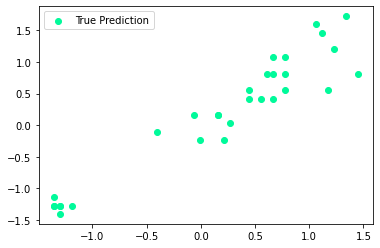

In [28]:
plt.scatter(x=TruePred['petal_length'], y=TruePred['petal_width'], c="mediumspringgreen", label='True Prediction')
# plt.scatter(x=FalsePred['petal_length'], y=FalsePred['petal_width'], c="tomato", label='False Prediction')
plt.legend()
plt.show()